In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from plotly.offline import init_notebook_mode, iplot  
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings('ignore')


In [3]:
data = pd.read_csv(r"C:\Users\ASUS\Downloads\Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


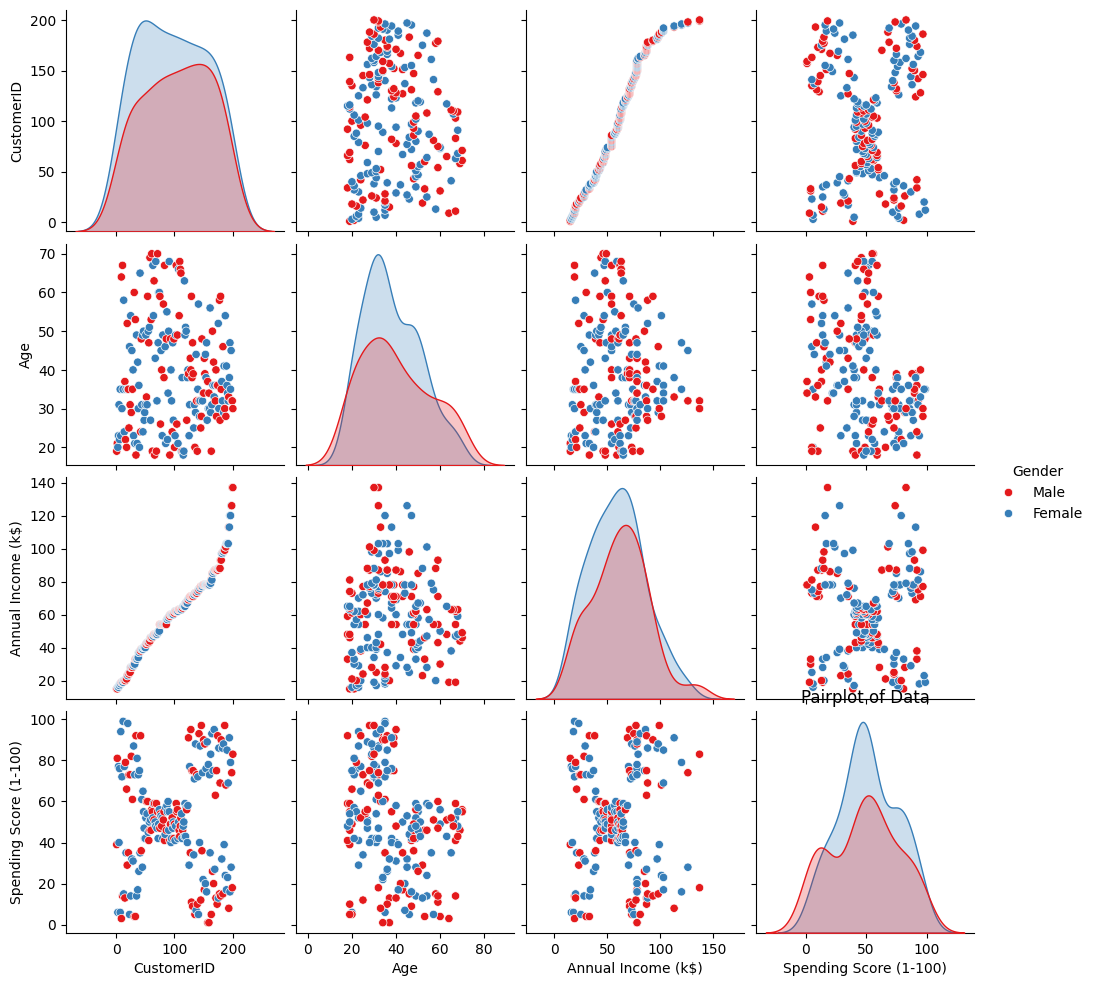

In [6]:
sns.pairplot(data, hue='Gender', kind='scatter', diag_kind='kde', palette='Set1')
plt.title("Pairplot of Data")
plt.show()

In [7]:
data = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [8]:
scaler = StandardScaler()
X = scaler.fit_transform(data)

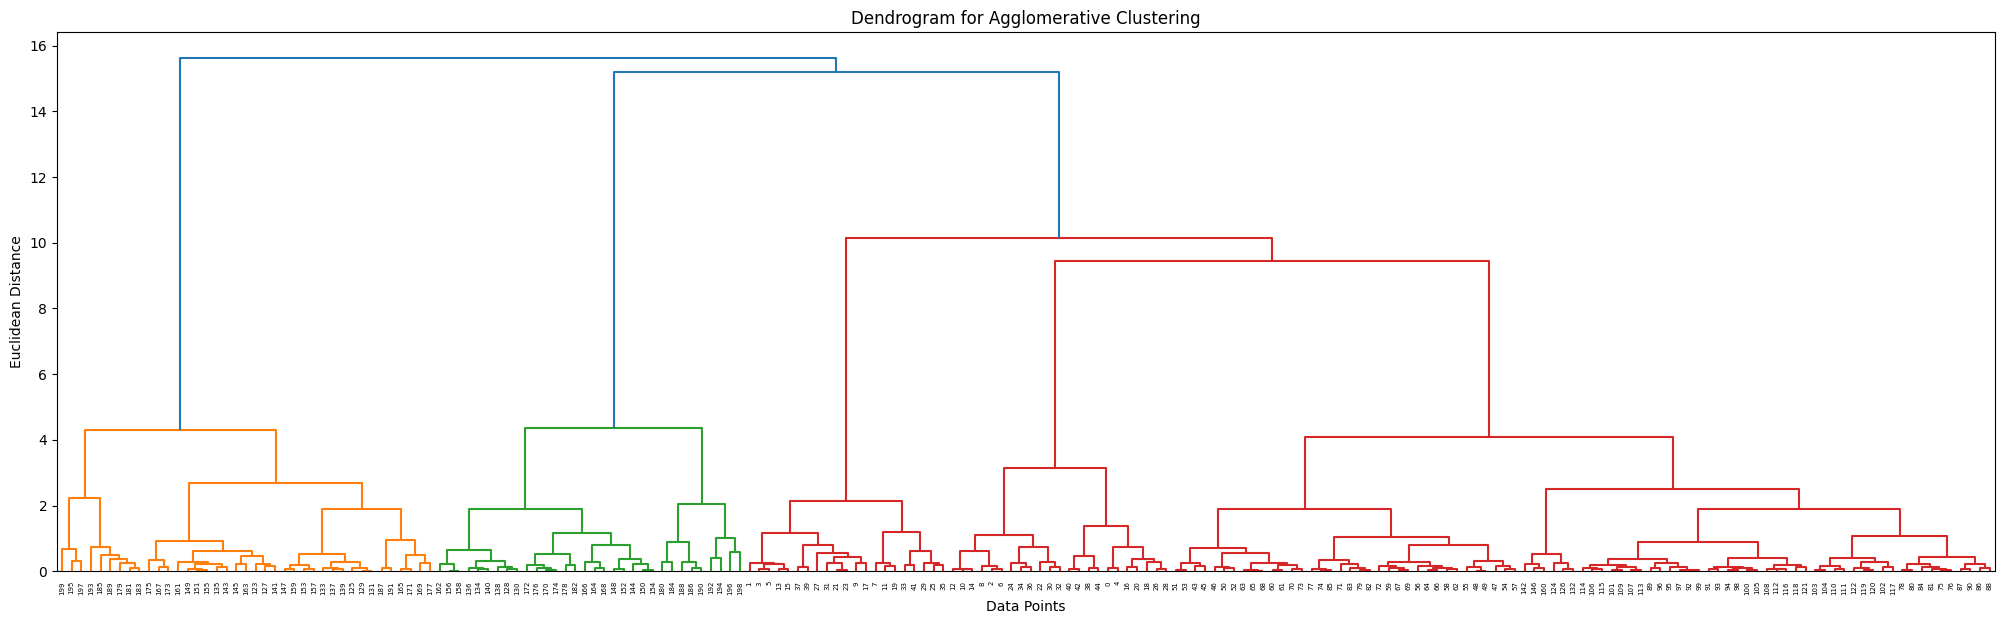

In [9]:
plt.figure(figsize=(25, 7))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram for Agglomerative Clustering')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [10]:
agglom = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
y_agglo = agglom.fit_predict(X)
data.loc[:, 'Labels'] = y_agglo

In [11]:
fig = px.scatter(data, x='Annual Income (k$)', y='Spending Score (1-100)', 
                 color=data['Labels'].astype(str), 
                 title='Agglomerative Clustering with 5 Clusters',
                 labels={'Labels': 'Cluster'},
                 color_discrete_sequence=px.colors.qualitative.Set1)
iplot(fig)


In [12]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    y_kmeans = kmeans.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])
    data['KMeans_Labels'] = y_kmeans

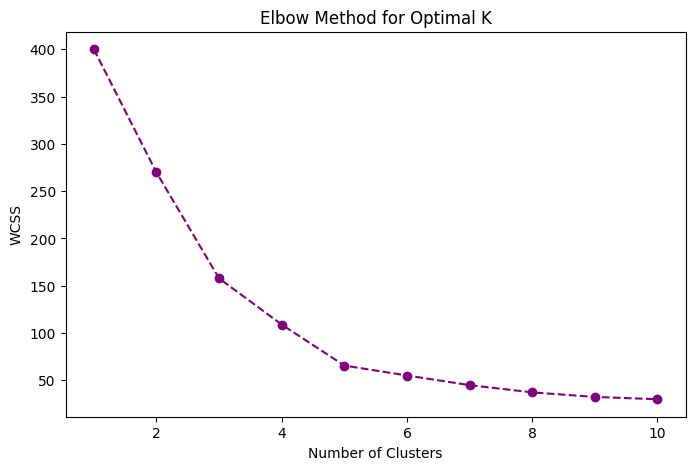

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='purple')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal K')
plt.show()

In [14]:
db = DBSCAN(eps=15, min_samples=6)
y = db.fit_predict(data[['Annual Income (k$)', 'Spending Score (1-100)']])  
data['Labels'] = y

In [15]:
fig = px.scatter(data, 
                 x='Annual Income (k$)', 
                 y='Spending Score (1-100)', 
                 color=data['Labels'].astype(str),  
                 title='DBSCAN Clustering (eps=15, min_samples=6)', 
                 labels={'Labels': 'Cluster'},
                 color_discrete_sequence=px.colors.qualitative.Set2)

fig.update_layout(
    xaxis_title="Annual Income (k$)",
    yaxis_title="Spending Score (1-100)",
    title="DBSCAN Clustering (eps=15, min_samples=6)"
)

iplot(fig)

In [16]:
kmeans_silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y_kmeans)
agglomerative_silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y_agglo)
dbscan_silhouette = silhouette_score(data[['Annual Income (k$)', 'Spending Score (1-100)']], y) 
print("Silhouette Score:")
print("K-Means Silhouette Score:", kmeans_silhouette)
print("Agglomerative Clustering Silhouette Score:", agglomerative_silhouette)
print("DBSCAN Silhouette Score:", dbscan_silhouette)

Silhouette Score:
K-Means Silhouette Score: 0.4410568674364981
Agglomerative Clustering Silhouette Score: 0.5529945955148897
DBSCAN Silhouette Score: 0.41673581087761136


In [17]:
pie_fig = px.pie(data, names='Labels', title='Cluster Distribution - Agglomerative Clustering',
                 color_discrete_sequence=px.colors.sequential.Purples)
iplot(fig)